In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
data_df = pd.read_csv(r"../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")

In [5]:
data_df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [6]:
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## check missing data

In [7]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default.payment.next.month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data unbalance

### Let's check data unbalance with respect with target value, i.e. default.payment.next.month.

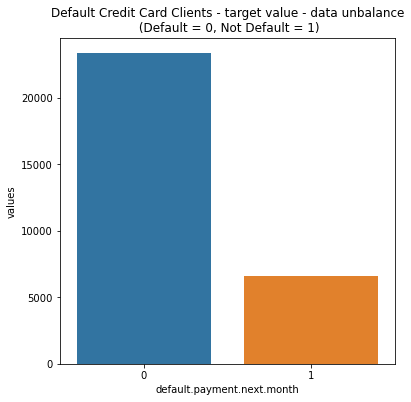

In [8]:
temp = data_df['default.payment.next.month'].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index, 'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes('pastel')
sns.barplot(x = 'default.payment.next.month', y='values', data=df)
locs, labels = plt.xticks()
plt.show()

### A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

## Data Exploration

### Amount of credit limit

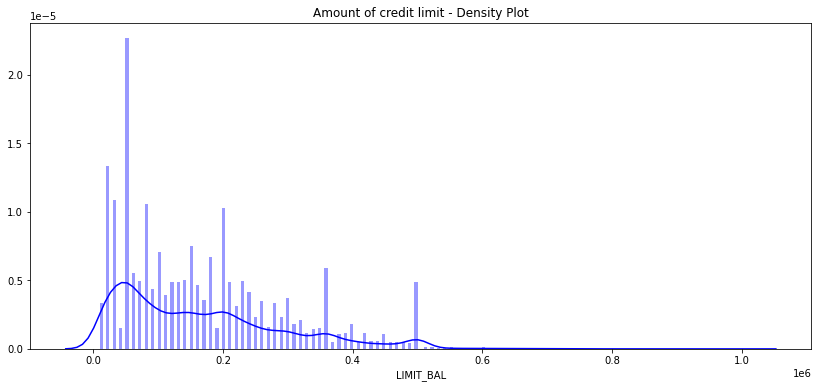

In [9]:
plt.figure(figsize = (14, 6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes('pastel')
sns.distplot(data_df['LIMIT_BAL'], kde=True, bins=200, color='blue')
plt.show()

In [10]:
data_df['LIMIT_BAL'].value_counts().shape

(81,)

In [11]:
data_df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

## Amount of credit limit grouped by default payment next month

#### Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

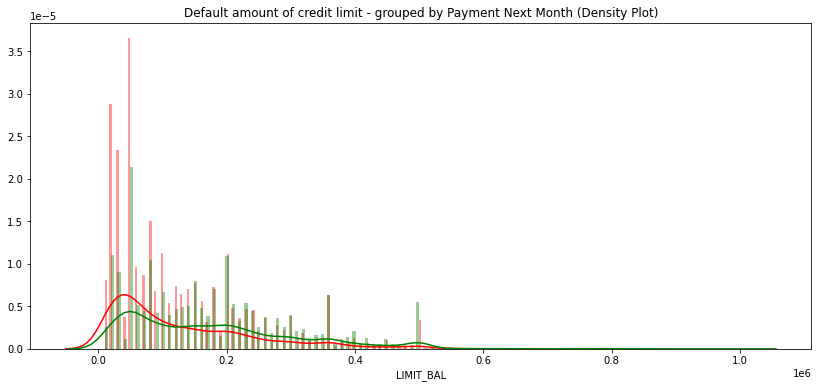

In [12]:
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14, 6))
plt.title('Default amount of credit limit - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1, kde = True, bins=200, color="red")
sns.distplot(class_0, kde = True, bins=200, color="green")
plt.show()

## Credit limit vs. Sex

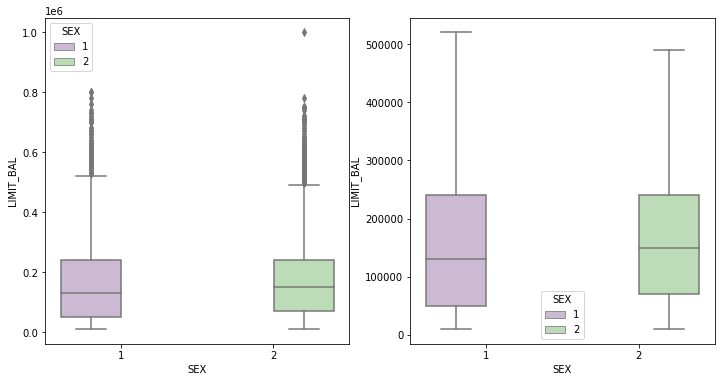

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX", data=data_df, palette="PRGn", showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX", data=data_df, palette="PRGn", showfliers=False)
plt.show()

## Features correlation

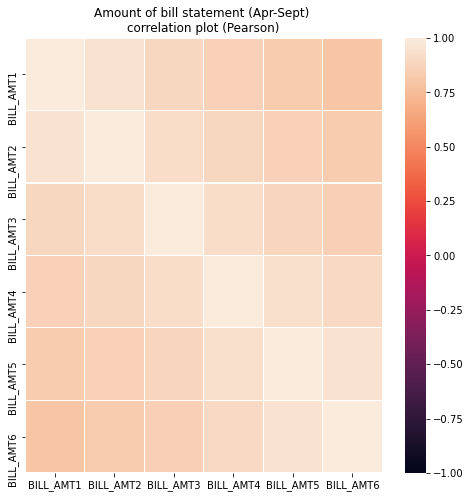

In [14]:
var = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

### Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

Let's check the correlation of Amount of previous payment in April - September 2005.

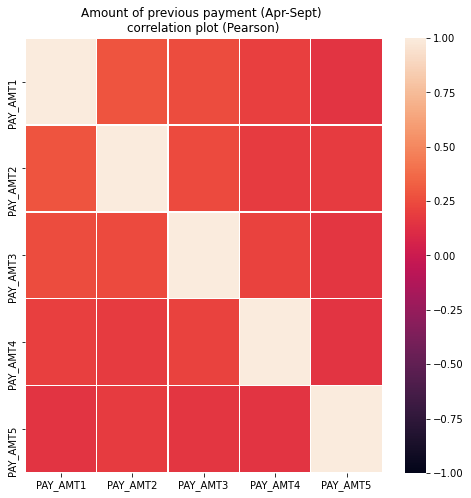

In [15]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

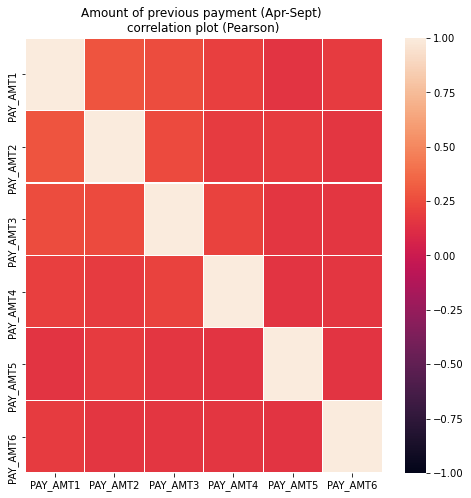

In [16]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Sex, Education, Age and Marriage.
Let's show sex, education, age and marriage distributions.

We start by showing the boxplots with age distribution grouped by marriage status and sex.

Marriage status meaning is:

0 : unknown (let's consider as others as well)
1 : married
2 : single
3 : others
Sex meaning is:

1 : male
2 : female

In [17]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3, data=data_df, palette='PRGn', showfliers=False)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

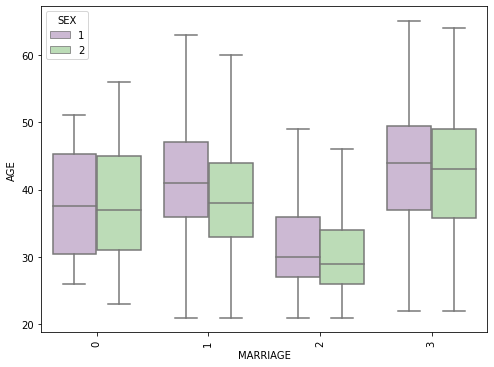

In [18]:
boxplot_variation('MARRIAGE', 'AGE', 'SEX', 8)

It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.

Let's show the boxplots with age distribution grouped by education and marriage.

Education status meaning is:

1 : graduate school
2 : university
3 : high school
4 : others
5 : unknown
6 : unknow

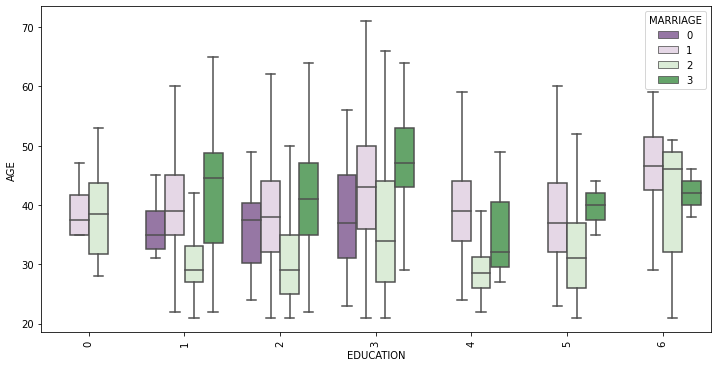

In [19]:
boxplot_variation('EDUCATION','AGE','MARRIAGE', 12)

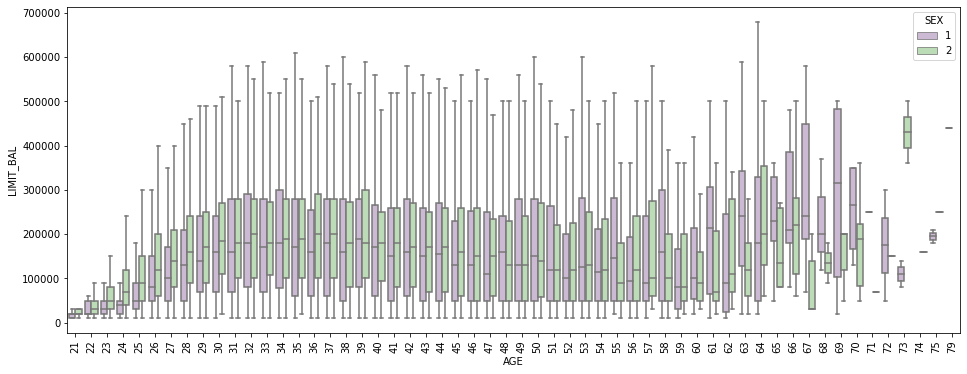

In [20]:
boxplot_variation('AGE', 'LIMIT_BAL', 'SEX', 16)

Mean, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.

Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females.




## Marriage status, education level and credit amount limit

### Let's show the boxplots with credit amount limit distribution grouped by marriage status and education level

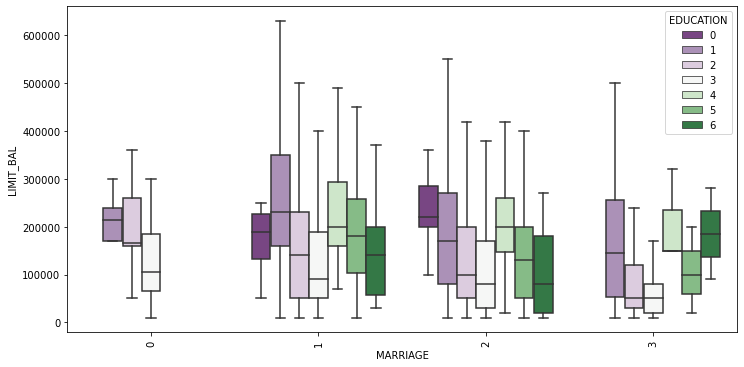

In [21]:
boxplot_variation('MARRIAGE', 'LIMIT_BAL', 'EDUCATION', 12)

In [22]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

# Pridictive Model

### Define predictors and target values


Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [23]:
target = 'default.payment.next.month'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
              'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
              'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
              'PAY_AMT6']

### Split data in train and validation set

#### Let's define train and validation sets

In [24]:
train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

#### We also make copies of the train_df and val_df for later useage.

In [25]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

# Random classifier

#### Let's run a model using the training set for training. Then, we will use the validation set for validation.

Metric

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) [4]. Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [26]:
clf = RandomForestClassifier(n_jobs=NO_JOBS,
                            random_state=RANDOM_STATE,
                            criterion=RFC_METRIC,
                            n_estimators=NUM_ESTIMATORS,
                            verbose=False)

In [27]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [28]:
preds = clf.predict(val_df[predictors])

In [29]:
print(preds)

[0 0 0 ... 0 0 0]


## Feature Importance

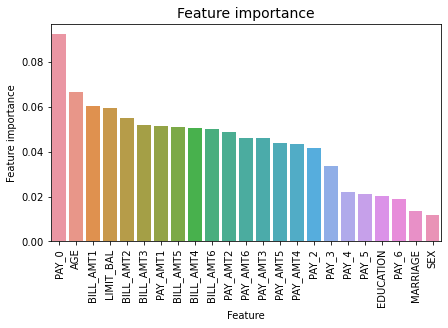

In [30]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance':clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize= (7, 4))
plt.title('Feature importance', fontsize=14)
s = sns.barplot(x='Feature', y='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

## Confusion matrix

### Let's show a confusion matrix for the results we obtained.

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_df[target].values, preds)
cm

array([[4438,  270],
       [ 798,  494]])

In [32]:
roc_auc_score(val_df[target].values, preds)

0.6625018741566295

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(val_df[target].values, preds)
accuracy

0.822

## RandomForrest with OneHotEncoder

In [35]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [36]:
train_f_df = pd.get_dummies(train_df_bkp, columns= cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [37]:
print("Default of Credit Card Clients train data - rows:", train_f_df.shape[0], "columns:", train_f_df.shape[1])
print("Default of Credit Card Clients val data - rows:", val_f_df.shape[0], "columns:", val_f_df.shape[1])

Default of Credit Card Clients train data - rows: 24000 columns: 93
Default of Credit Card Clients val data - rows: 6000 columns: 86


#### Because train and validation data does not have the same number of columns, we will align them.

In [38]:
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

#### Let's check again the data

In [39]:
print("Default of Credit Card Clients train data - rows:", train_fa_df.shape[0], "columns:", train_fa_df.shape[1])
print("Default of Credit Card Clients val data - rows:", val_fa_df.shape[0], "columns:", val_fa_df.shape[1])

Default of Credit Card Clients train data - rows: 24000 columns: 93
Default of Credit Card Clients val data - rows: 6000 columns: 93


In [40]:
train_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,...,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
22659,48,175095.0,175522.0,173918.0,174074.0,178671.0,178869.0,0,0,0,1,0,0,0,22660,150000.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10011.0,6200.0,5874.0,10000.0,6054.0,7108.0,0,1,0
6618,37,8788.0,40927.0,28306.0,31578.0,21195.0,11776.0,0,0,1,0,0,0,0,6619,180000.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,40970.0,1210.0,10015.0,10009.0,11783.0,110306.0,1,0,0
26605,23,2400.0,2400.0,2400.0,2400.0,2400.0,1800.0,0,0,1,0,0,0,0,26606,20000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
2504,30,440.0,30404.0,0.0,880.0,150.0,430.0,0,0,1,0,0,0,0,2505,180000.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30404.0,0.0,880.0,150.0,430.0,747.0,1,0,0
1111,44,3424.0,155.0,1922.0,1473.0,1865.0,835.0,0,0,0,1,0,0,0,1112,50000.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,155.0,1922.0,1473.0,1865.0,835.0,1833.0,0,1,0


#### Let's define the target and predictors lists.

In [41]:
target_f = 'default.payment.next.month'
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'LIMIT_BAL', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_-2', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

In [42]:
clf.fit(train_fa_df[predictors_f], train_df[target_f].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [43]:
preds2 = clf.predict(val_fa_df[predictors_f])
preds2

array([0, 0, 0, ..., 0, 0, 0])

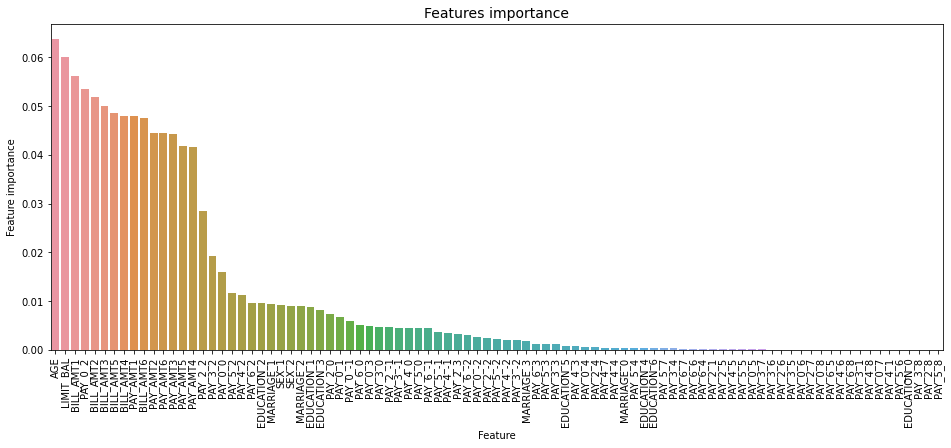

In [44]:
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize = (16,6))
plt.title('Features importance', fontsize=14)
s = sns.barplot(x='Feature', y ='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [45]:
cm2 = confusion_matrix(val_fa_df[target].values, preds2)
cm2

array([[4449,  259],
       [ 790,  502]])

In [46]:
accuracy2 = accuracy_score(val_fa_df[target].values, preds2)
accuracy2

0.8251666666666667

In [47]:
roc_auc_score(val_fa_df[target].values, preds2)

0.6667660736878931

# AdaBoostClassifier
### AdaBoostClassifier stands for Adaptive Boosting Classifier

In [48]:
clf = AdaBoostClassifier(random_state = RANDOM_STATE,
                         algorithm = 'SAMME.R',
                         learning_rate = 0.8,
                         n_estimators = NUM_ESTIMATORS)

In [49]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [50]:
preds3 = clf.predict(val_df[predictors])

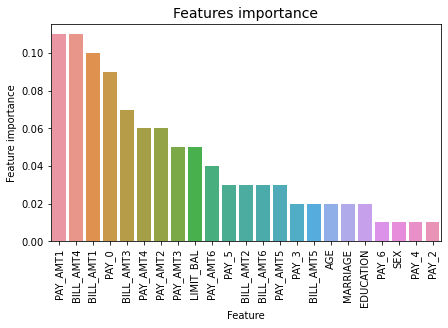

In [51]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [52]:
cm3 = confusion_matrix(val_df[target].values, preds3)
cm3

array([[4487,  221],
       [ 821,  471]])

In [53]:
accuracy = accuracy_score(val_df[target].values, preds3)
accuracy

0.8263333333333334

In [54]:
roc_auc_score(val_df[target].values, preds3)

0.6588048536053512

# CatBoostClassifier

In [55]:
from catboost import CatBoostClassifier

In [56]:
clf = CatBoostClassifier(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='AUC',
                         random_seed = RANDOM_STATE,
                         bagging_temperature=0.2,
                         od_type='Iter',
                         metric_period = VERBOSE_EVAL,
                         od_wait=100)

In [57]:
clf.fit(train_df[predictors], train_df[target].values, verbose=True)

0:	total: 290ms	remaining: 2m 24s
50:	total: 8.46s	remaining: 1m 14s
100:	total: 16.4s	remaining: 1m 4s
150:	total: 24.3s	remaining: 56.1s
200:	total: 32.2s	remaining: 47.9s
250:	total: 40.5s	remaining: 40.1s
300:	total: 48.4s	remaining: 32s
350:	total: 55.8s	remaining: 23.7s
400:	total: 1m 3s	remaining: 15.6s
450:	total: 1m 11s	remaining: 7.73s
499:	total: 1m 18s	remaining: 0us


In [58]:
preds4 = clf.predict(val_df[predictors])

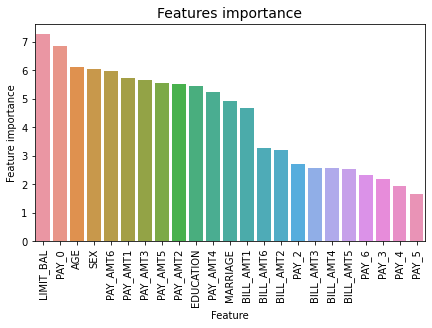

In [59]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [60]:
cm4 = confusion_matrix(val_df[target].values, preds4)
cm4

array([[4479,  229],
       [ 810,  482]])

In [61]:
accuracy = accuracy_score(val_df[target].values, preds4)
accuracy

0.8268333333333333

In [62]:
roc_auc_score(val_df[target].values, preds4)

0.6622122018775761

In [63]:
# prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [64]:
model = xgb.train(params,
                  dtrain,
                  MAX_ROUNDS,
                  watchlist,
                  early_stopping_rounds = EARLY_STOP,
                  maximize = True,
                  verbose_eval=VERBOSE_EVAL)

[16:11:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.69220	valid-auc:0.69740
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.76944	valid-auc:0.76463
[100]	train-auc:0.77743	valid-auc:0.77280
[150]	train-auc:0.78309	valid-auc:0.77711
[200]	train-auc:0.78667	valid-auc:0.77918
[250]	train-auc:0.78964	valid-auc:0.77999
[300]	train-auc:0.79226	valid-auc:0.78030
[350]	train-auc:0.79442	valid-auc:0.78161
[400]	train-auc:0.79643	valid-auc:0.78229
[450]	train-auc:0.79803	valid-auc:0.78255
[500]	train-auc:0.79969	valid-auc:0.78312
[550]	train-auc:0.80114	valid-auc:0.78296
Stopping. Best iterati

#### The best validation score (ROC-AUC) was 0.78, for round 538.



#### Plot Variable importance

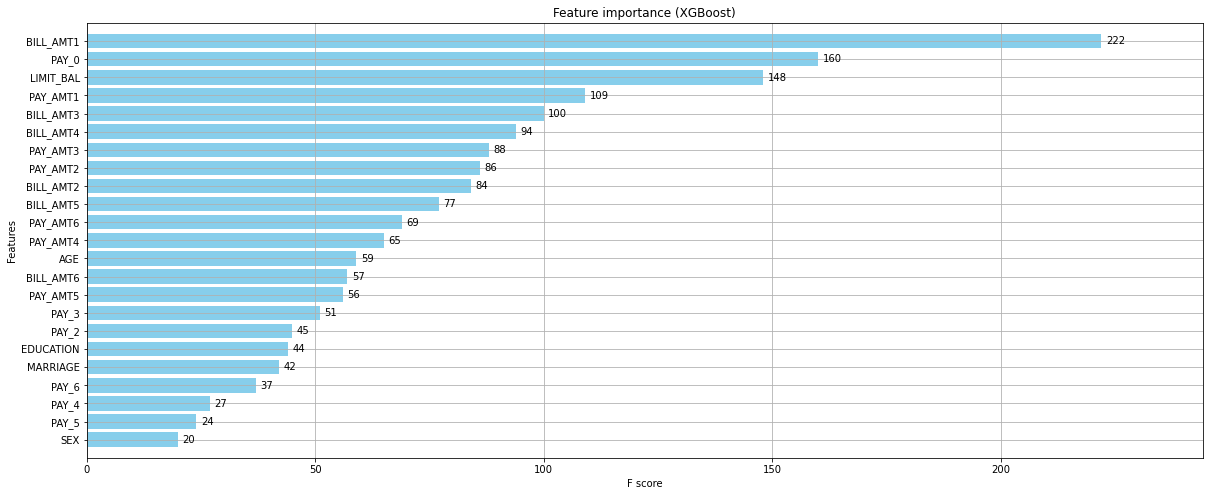

In [66]:
fig, (ax) = plt.subplots(ncols=1, figsize=(20, 8))
xgb.plot_importance(model, height=0.8, title="Feature importance (XGBoost)", ax=ax, color="skyblue")
plt.show()

# LightGBM

In [67]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

In [68]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_4', 'PAY_6']

In [72]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

In [73]:
evals_results = {}

model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dvalid],
                  valid_names=['train','valid'],
                  evals_result=evals_results,
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL,
                  feval=None)
del dvalid
gc.collect()


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.77952	valid's auc: 0.773764
[100]	train's auc: 0.789342	valid's auc: 0.783578
[150]	train's auc: 0.794993	valid's auc: 0.785526
[200]	train's auc: 0.79997	valid's auc: 0.78578
[250]	train's auc: 0.804867	valid's auc: 0.786571
[300]	train's auc: 0.808712	valid's auc: 0.786563
Early stopping, best iteration is:
[265]	train's auc: 0.806195	valid's auc: 0.78667


6035

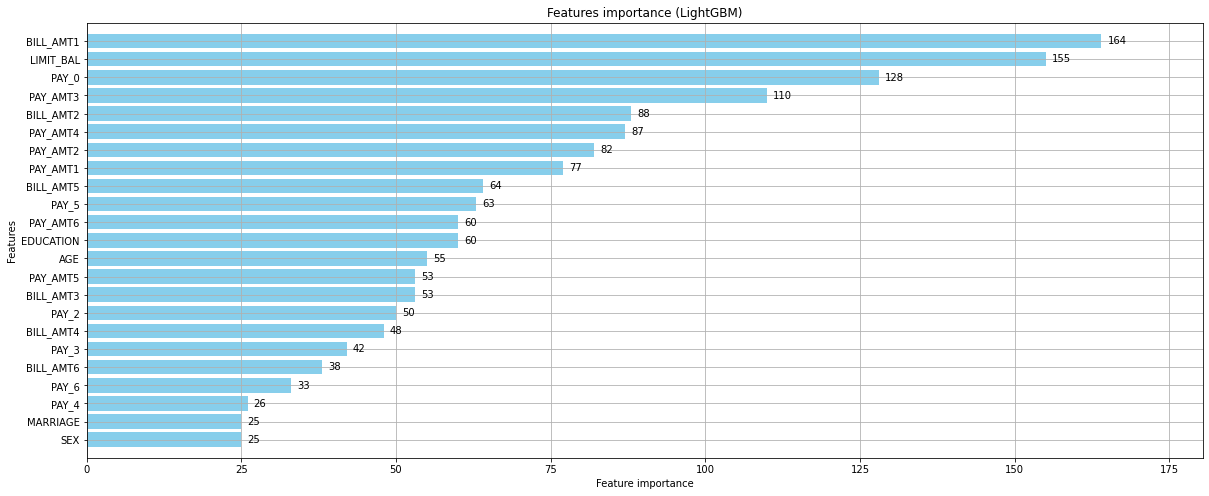

In [75]:
fig, (ax) = plt.subplots(ncols=1, figsize=(20,8))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="skyblue") 
plt.show()

## Training and validation using cross-validation

#### Let's use now cross-validation. We will use cross-validation (KFolds) with 5 folds. Data is divided in 5 folds and, by rotation, we are training using 4 folds (n-1) and validate using the 5th (nth) fold.

In [76]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)
for train_index, test_index in kf.split(data_df):
    train_X, valid_X = data_df.iloc[train_index], data_df.iloc[test_index]

    dtrain = lgb.Dataset(train_X[predictors].values, label=train_X[target].values,
                     feature_name=predictors)

    dvalid = lgb.Dataset(valid_X[predictors].values, label=valid_X[target].values,
                     feature_name=predictors)

    evals_results = {}
    model =  lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.780056	valid's auc: 0.772737
[100]	train's auc: 0.788423	valid's auc: 0.78151
[150]	train's auc: 0.794482	valid's auc: 0.785206
[200]	train's auc: 0.800056	valid's auc: 0.786003
Early stopping, best iteration is:
[179]	train's auc: 0.797754	valid's auc: 0.786358
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.781038	valid's auc: 0.765193
[100]	train's auc: 0.790231	valid's auc: 0.772792
[150]	train's auc: 0.796439	valid's auc: 0.776192
[200]	train's auc: 0.801874	valid's auc: 0.77808
[250]	train's auc: 0.806362	valid's auc: 0.778646
[300]	train's auc: 0.810772	valid's auc: 0.778275
Early stopping, best iteration is:
[273]	train's auc: 0.808364	valid's auc: 0.778849
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778705	valid's auc: 0.7804
[100]	train's auc: 0.787819	valid's auc: 0.788209
[150]	train's auc: 0.793608	valid's auc: 0.789017
[200